**This notebook defines and trains a baseline Convolutional Neural Network (CNN) from scratch using the preprocessed 224×224 dataset.**

Steps:

- A simple CNN architecture was created with convolutional layers, pooling, dropout, and dense output.

- The model was compiled using the Adam optimizer and trained for 10 epochs.

- Performance was tracked using training and validation accuracy/loss curves.



# **Data Split**

In [19]:
from tensorflow.keras.utils import image_dataset_from_directory

subset_dir = "/Users/lauratm/Downloads/archive/subset_224x224"
image_size = (224, 224)
batch_size = 10

train_ds = image_dataset_from_directory(
    subset_dir,
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

val_ds = image_dataset_from_directory(
    subset_dir,
    validation_split=0.6,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)


Found 1568 files belonging to 7 classes.
Using 1255 files for training.
Found 1568 files belonging to 7 classes.
Using 940 files for validation.


# **Train Baseline**

Epoch 1/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 16s 120ms/step - accuracy: 0.1474 - loss: 3.3852 - val_accuracy: 0.2032 - val_loss: 1.9399
Epoch 2/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 15s 120ms/step - accuracy: 0.1883 - loss: 1.9405 - val_accuracy: 0.2447 - val_loss: 1.8988
Epoch 3/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 15s 121ms/step - accuracy: 0.2127 - loss: 1.8937 - val_accuracy: 0.3660 - val_loss: 1.7959
Epoch 4/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 15s 119ms/step - accuracy: 0.3171 - loss: 1.7344 - val_accuracy: 0.4628 - val_loss: 1.6609
Epoch 5/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 15s 119ms/step - accuracy: 0.4655 - loss: 1.4847 - val_accuracy: 0.5372 - val_loss: 1.4807
Epoch 6/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 15s 119ms/step - accuracy: 0.5499 - loss: 1.2880 - val_accuracy: 0.6117 - val_loss: 1.3081
Epoch 7/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 15s 121ms/step - accuracy: 0.6535 - loss: 0.9695 - val_accuracy: 0.6606 - val_loss: 1.1905
Epoch 8/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 15s 120ms/step - accuracy: 0.7490 - loss: 0

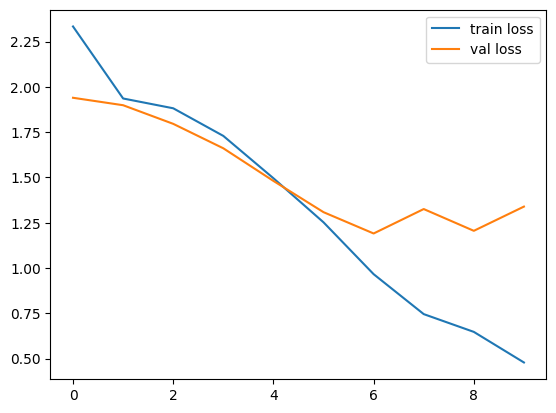

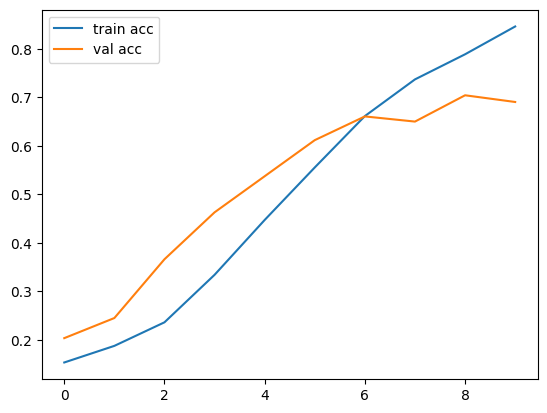

In [21]:
import keras
from keras import layers
import matplotlib.pyplot as plt

# Create a basic CNN model
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    x = layers.Rescaling(1.0 / 255)(inputs)
    x = layers.Conv2D(32, 3, activation="relu")(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Conv2D(64, 3, activation="relu")(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation="relu")(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes)(x)  
    return keras.Model(inputs, outputs)

# Prepare model
num_classes = len(train_ds.class_names)
model = make_model(input_shape=(224, 224, 3), num_classes=num_classes)

model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

# Train the model
history = model.fit(train_ds, validation_data=val_ds, epochs=10)

# Plot training curves
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="val loss")
plt.legend()
plt.show()

plt.plot(history.history["accuracy"], label="train acc")
plt.plot(history.history["val_accuracy"], label="val acc")
plt.legend()
plt.show()

# Save model
model.save("baseline_model.keras")
